In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Лабораторная работа №1
## Задание 2
### {Фамилия Имя}, {Номер группы}, Вариант {Номер варианта}, ({Дата})

### Задание

По данным выборки ($n=150$) требуется:
1. Составить статистическое распределение выборки, предварительно записав дискретный вариационный ряд.
1. Составить ряд распределения относительных частот.
2. Построить полигон частот.
3. Составить эмпирическую функцию распределения.
4. Построить график эмпирической функции распределения.
5. Найти основные числовые характеристики вариационного ряда:
	- Выборочное среднее - $\overline x_в$
	- Выборочную дисперсию - $S^2$
	- Стандартное отклонение (Среднеквадратическое отклонение) - $S$
	- Коэффициент вариации - $CV$
7. Пояснить смысл полученных результатов.

### Данные

In [2]:
lb_author = 'Кондрашин Тимофей'
lb_num = 1
lb_excercise_num = 2
lb_variant = 1
print(f'Фамилия Имя: {lb_author}\nНомер лабораторной работы: {lb_num}\nНомер задания лабораторной работы: {lb_excercise_num}\nВариант лабораторной работы: {lb_variant}')

Фамилия Имя: Кондрашин Тимофей
Номер лабораторной работы: 1
Номер задания лабораторной работы: 2
Вариант лабораторной работы: 1


In [3]:
data = pd.Series(
    [2, 3, 4, 0, 2, 5, 3, 3, 3, 3, 2, 0, 6, 2, 3, 1, 5, 2, 4, 2, 4, 3, 1, 2, 3, 2, 2, 2, 3, 4, 1, 6, 2, 3, 3, 2, 0, 6,
     2, 5, 0, 2, 4, 3, 2, 6, 0, 2, 5, 3, 3, 3, 5, 4, 3, 1, 4, 5, 4, 3, 2, 1, 2, 3, 2, 2, 0, 2, 5, 3, 3, 1, 6, 2, 4, 6,
     0, 4, 3, 1, 4, 5, 2, 4, 2, 4, 3, 2, 3, 4, 5, 2, 0, 2, 4, 3, 2, 1, 6, 2, 3, 3, 2, 0, 6, 0, 2, 5, 3, 3, 3, 1, 2, 3,
     2, 2, 5, 2, 3, 4, 5, 4, 2, 2, 4, 2, 4, 3, 4, 3, 1, 4, 5, 2, 5, 3, 3, 3, 2, 0, 6, 1, 6, 2, 0, 2, 4, 3, 2, 0])
data.T

0      2
1      3
2      4
3      0
4      2
      ..
145    2
146    4
147    3
148    2
149    0
Length: 150, dtype: int64

### Всего элементов ряда

In [4]:
data_len = len(data)
data_len

150

## Пункт 1
**Составить статистическое распределение выборки, предварительно записав дискретный вариационный ряд.**

### Вариационный ряд

In [7]:
data_sort = data.sort_values()
data_sort.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

## Пункт 2
**Составить ряд распределения относительных частот.**

### Варианты, $x_i$

In [11]:
unique = sorted(data.unique())
unique

[0, 1, 2, 3, 4, 5, 6]

### Частота, $n_i$

In [14]:
freq = pd.Series(data_sort).value_counts().sort_index()
freq = pd.DataFrame(freq, index=unique, columns=["Частота"]).T
freq

,0,1,2,3,4,5,6
Частота,13,11,43,37,22,14,10


### Относительная частота, $w_i$

In [18]:
rel_freq = pd.Series(data_sort).value_counts().sort_index() / len(data_sort)
rel_freq = pd.DataFrame(rel_freq, index=unique, columns=["Частота"]).T
rel_freq

,0,1,2,3,4,5,6
Частота,0.086667,0.073333,0.286667,0.246667,0.146667,0.093333,0.066667


## Пункт 3
**Построить полигон частот.**

### Полигон частот вариационного ряда

In [27]:
px.line(x=unique, y=freq.iloc[0], markers=True, title='£')

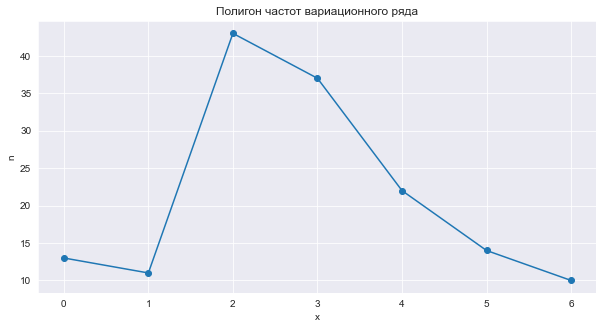

In [19]:
def plot_freq_polygon(x, y, title):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.plot(x, y, marker='o')
    ax.set_xlabel("x")
    ax.set_ylabel("n")
    plt.plot()

plot_freq_polygon(x=unique, y=freq.iloc[0], title='Полигон частот вариационного ряда')

### Полигон относительных частот вариационного ряда

In [28]:
px.line(x=unique, y=rel_freq.iloc[0], markers=True, title='Полигон относительных частот вариационного ряда')

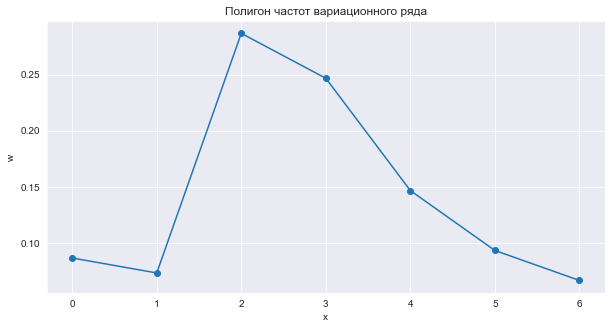

In [20]:
def plot_rel_freq_polygon(x, y, title):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.plot(x, y, marker='o')
    ax.set_xlabel("x")
    ax.set_ylabel("w")
    plt.plot()

plot_rel_freq_polygon(x=unique, y=rel_freq.iloc[0], title='Полигон частот вариационного ряда')

## Пункт 4
**Составить эмпирическую функцию распределения.**

### Эмпирическая функция распределения $F^*$

In [36]:
emp_func = rel_freq.iloc[0].cumsum()
emp_func.name = "F*"
emp_func = pd.DataFrame(emp_func, index=unique).T
emp_func

,0,1,2,3,4,5,6
F*,0.086667,0.16,0.446667,0.693333,0.84,0.933333,1.0


$$
F^* (x) =
\begin{cases}
0, && x \le 0 \\
0.086667, && 0 < x \le 1 \\
0.16, && 1 < x \le 2 \\
0.446667, && 2 < x \le 3 \\
0.693333, && 3 < x \le 4 \\
0.84, && 4 < x \le 5 \\
0.933333, && 5 < x \le 6 \\
1, && x > 6
\end{cases}
$$

## Пункт 5
**Построить график эмпирической функции распределения.**

### График эмпирической функции распределения

In [30]:
px.ecdf(x=emp_func.columns.values.tolist(), y=emp_func.values.tolist()[0], markers=True, ecdfmode="standard",
        title='График эмпирической функции распределения')

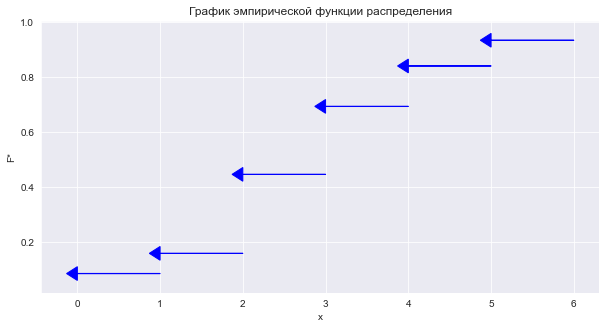

In [39]:
def plot_cdf_func(x, y, title, c=1):
    fig, ax = plt.subplots(figsize=(10, 5))
    min_y, max_y = min(y), max(y)
    arrow_length = ((max_y - min_y) / len(y)) * c
    for idx in range(len(y) - 1):
        dx = x[idx] - x[idx + 1]
        ax.arrow(x=x[idx + 1], y=y[idx], dx=dx, dy=0, color="blue", head_width=.05, head_length=arrow_length)
    ax.set_title(title)
    ax.set_ylabel("F*")
    ax.set_xlabel("x")
    plt.plot()

plot_cdf_func(unique, emp_func.iloc[0].tolist(), 'График эмпирической функции распределения')

## Пункт 6
**Найти основные числовые характеристики вариационного ряда**

### Выборочное среднее

$$\overline x = \frac1n \sum^n_{i=1} x_i$$

In [40]:
mean = np.mean(data)
mean

2.84

### Выборочная дисперсия

$$s^2_x = \frac{1}{n-1}\sum^n_{i=1} (x_i - \overline x)^2$$

In [46]:
var = np.var(data, ddof=1)
var

2.470872483221476

### Среднеквадратическое отклонение

$$s = \sqrt{s^2}$$

In [48]:
std = np.std(data, ddof=1)
std

1.5719009139323878

### Коэффицент вариации

$$CV = \frac{s}{\overline x} \cdot 100$$

In [49]:
cv = (std / mean) * 100
cv

55.34862373001366

## Пункт 7
**Пояснить смысл полученных результатов.**

$$\overline x = 2.84$$
$$s^2_x = 2.4544$$
$$s = 1.5666524822052912$$
$$CV = 55.163819795960954$$

In [35]:
answer = pd.DataFrame()
answer['Фамилия Имя'] = [lb_author]
answer['Номер лабораторной работы'] = [lb_num]
answer['Номер задания лабораторной работы'] = [lb_excercise_num]
answer['Вариант лабораторной работы'] = [lb_variant]
answer['Вариационный ряд'] = [str(data_sort)]
answer['Варианты'] = [str(unique)]
answer['Частота'] = [str(freq.iloc[0].tolist())]
answer['Относительная частота'] = [str(rel_freq.iloc[0].tolist())]
answer['Эмпирическая функция распределения'] = [str(emp_func.iloc[0].tolist())]
answer['Выборочное среднее'] = [mean[0]]
answer['Выборочная дисперсия'] = [var[0]]
answer['Среднеквадратическое отклонение'] = [std[0]]
answer['Коэффицент вариации'] = [cv[0]]
answer.to_csv('Кондрашин_ЛБ1_Задание_2.csv', index=False)
answer

,Фамилия Имя,Номер лабораторной работы,Номер задания лабораторной работы,Вариант лабораторной работы,Вариационный ряд,Варианты,Частота,Относительная частота,Эмпирическая функция распределения,Выборочное среднее,Выборочная дисперсия,Среднеквадратическое отклонение,Коэффицент вариации
0,Кондрашин Тимофей,1,2,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6]","[13, 11, 43, 37, 22, 14, 10]","[0.08666666666666667, 0.07333333333333333, 0.2...","[0.0, 0.08666666666666667, 0.16, 0.44666666666...",2.84,2.4544,1.566652,55.16382
